In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Team Assignment 1 Data.csv', delimiter = ';')


In [3]:
df['Age'] = df['Age'].str.replace(',', '.').astype(float)

df['Age'] = df['Age'].astype(int)


In [14]:
df.head()

,Review_ID,Number_Words_Review,ZNumber_Words_Review,Prod_Desig,Prod_Design_positive,Prod_Design_negative,Prod_Technical,Prod_Technical_positive,Prod_Technical_negative,Prod_Price,...,Serv_Delivery_positive,Serv_Delivery_negative,Category,Country,Gender,Age,Sentiment,Rating_Score,Purchase,Number_of_Purchases
0,1,34,"-0,178828858",1,1,0,1,1,0,0,...,0,0,0,1,0,24,4,5,1,1
1,2,32,"-0,225796385",1,1,0,1,1,0,1,...,0,0,0,1,0,38,5,4,0,0
2,3,54,"0,290846409",1,0,1,1,0,1,1,...,0,1,0,1,0,46,2,2,0,0
3,4,20,"-0,507601545",1,1,0,1,1,0,0,...,0,0,0,1,0,31,5,5,1,2
4,5,12,"-0,695471652",1,1,0,1,1,0,0,...,0,0,0,1,0,25,3,5,0,0


We don't consider 'Number of purchases' and 'purchase' from the start because they are done after the review so they'll likely not effect the review score
We use only positive and negative topics to avoid redundancy

In [15]:
columns = ['Prod_Design_positive','Prod_Design_negative','Prod_Technical_positive','Prod_Technical_negative','Prod_Price_positive','Prod_Price_negative','Serv_Delivery_positive','Serv_Delivery_negative','Sentiment','Number_Words_Review','Gender','Age']
#ZNumber_Words_Review;Category;Country;Gender;Age;Sentiment;Rating_Score;Purchase;Number_of_Purchases
X = df[columns]
X.head()
Y = df['Rating_Score']

In [4]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

In [17]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Rating_Score   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     103.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          8.21e-136
Time:                        01:20:43   Log-Likelihood:                -639.55
No. Observations:                 600   AIC:                             1305.
Df Residuals:                     587   BIC:                             1362.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

Based on **t-statistic** and **P-value** we notice that:

- product design negative
- product price 
- service delivery positive
- number words review
- gender
- age

are not statistically significant. So we'll try another regression without them to see changes in $\R^2$

In [5]:
columns = ['Prod_Design_positive','Prod_Technical_positive','Prod_Technical_negative','Serv_Delivery_negative','Sentiment']
#ZNumber_Words_Review;Category;Country;Gender;Age;Sentiment;Rating_Score;Purchase;Number_of_Purchases
X = df[columns]
X.head()
Y = df['Rating_Score']

In [19]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:           Rating_Score   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     249.2
Date:                Wed, 20 Mar 2024   Prob (F-statistic):          3.16e-143
Time:                        01:20:43   Log-Likelihood:                -640.52
No. Observations:                 600   AIC:                             1293.
Df Residuals:                     594   BIC:                             1319.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

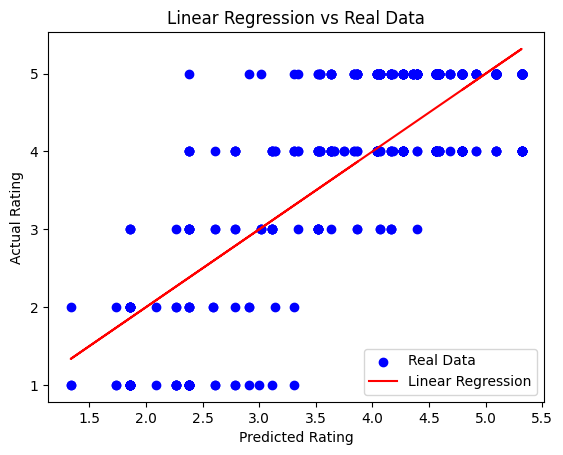

In [20]:
plt.scatter(predictions, Y, color='blue', label='Real Data')
plt.plot(predictions, predictions, color='red', label='Linear Regression')
plt.xlabel('Predicted Rating')
plt.ylabel('Actual Rating')
plt.title('Linear Regression vs Real Data')
plt.legend()
plt.show()


But because we have as a target a categorical ordinal data, we think that ***Ordered Logit model*** 
would fit better the data

In [6]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

In [21]:
model = OrderedModel(Y, X)
results = model.fit()
scores = results.predict(X)
model.score_obs_
#print_model = results.summary()
print(print_model)

                             OrderedModel Results                             
Dep. Variable:           Rating_Score   Log-Likelihood:                -452.74
Model:                   OrderedModel   AIC:                             923.5
Method:            Maximum Likelihood   BIC:                             963.1
Date:                Wed, 20 Mar 2024                                         
Time:                        01:31:22                                         
No. Observations:                 600                                         
Df Residuals:                     591                                         
Df Model:                           5                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Prod_Design_positive        0.2591      0.117      2.212      0.027       0.029       0.489
Prod_Technica

c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\optimizer.py:736: RuntimeWarning: Maximum number of iterations has been exceeded.
  retvals = optimize.fmin(f, start_params, args=fargs, xtol=xtol,
c:\Users\andre\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
